In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import os
import json
import datetime

In [2]:
DATAFOLDER_PATH = "multitudes_data_intern_tech_test-data/data/"
TIMESTAMP_FORMAT = "%Y-%m-%dT%H:%M:%SZ"

In [3]:
teamMembers_dataset = pd.read_csv(DATAFOLDER_PATH + "team_members.csv");
display(teamMembers_dataset)

,github_username,team,seniority
0,hadley,Ravenclaw,senior
1,kohske,Slytherin,senior
2,lock,Gryffindor,intermediate
3,jiho,Hufflepuff,senior
4,BrianDiggs,Hufflepuff,junior
...,...,...,...
72,seanpor,Slytherin,intermediate
73,jonthegeek,Hufflepuff,junior
74,beckymaust,Gryffindor,intermediate
75,sastoudt,Gryffindor,junior


## 1. Combine comments data from different months to create a dataset for a whole year.

In [4]:
def getSingleFiletypeInFolder(filetype, folderPath):
    json_filepaths = []
    for itemPath in os.listdir(folderPath):
        if itemPath.endswith(filetype):
            json_filepaths.append(folderPath + itemPath)
    return json_filepaths

json_filepaths = getSingleFiletypeInFolder(".json", DATAFOLDER_PATH)
json_filepaths

['multitudes_data_intern_tech_test-data/data/comments_1.json',
 'multitudes_data_intern_tech_test-data/data/comments_10.json',
 'multitudes_data_intern_tech_test-data/data/comments_11.json',
 'multitudes_data_intern_tech_test-data/data/comments_12.json',
 'multitudes_data_intern_tech_test-data/data/comments_2.json',
 'multitudes_data_intern_tech_test-data/data/comments_3.json',
 'multitudes_data_intern_tech_test-data/data/comments_4.json',
 'multitudes_data_intern_tech_test-data/data/comments_5.json',
 'multitudes_data_intern_tech_test-data/data/comments_6.json',
 'multitudes_data_intern_tech_test-data/data/comments_7.json',
 'multitudes_data_intern_tech_test-data/data/comments_8.json',
 'multitudes_data_intern_tech_test-data/data/comments_9.json']

In [5]:
def createListOfCommentFromJson(filepath):
    comments_data = []
    with open(filepath) as comments_file:
        data = json.load(comments_file)
        for repo in data:
            for comment in data[repo]:
                comment_arr = []
                comment_arr.append(comment["comment_id"])
                comment_arr.append(comment["comment_author"])
                comment_arr.append(datetime.datetime.strptime(comment["comment_created_date"], TIMESTAMP_FORMAT))
                comment_arr.append(comment["comment_text"])
                comments_data.append(comment_arr)
    return comments_data

comments_dataset = []
for i in range(len(json_filepaths)):
    comments_dataset = comments_dataset + createListOfCommentFromJson(json_filepaths[i])
comments_dataset = pd.DataFrame(comments_dataset, columns=["id", "author", "created date", "text"])

display(comments_dataset)

,id,author,created date,text
0,MDEyOklzc3VlQ29tbWVudDQ1NTc1MzEwMw==,lock,2020-01-19 06:07:16,This old issue has been automatically locked. ...
1,MDEyOklzc3VlQ29tbWVudDQ1NTc1MzEwMQ==,lock,2020-01-19 06:07:14,This old issue has been automatically locked. ...
2,MDEyOklzc3VlQ29tbWVudDQ1NTc1MzEwNA==,lock,2020-01-19 06:07:18,This old issue has been automatically locked. ...
3,MDEyOklzc3VlQ29tbWVudDQ1NTc1MzEwNg==,lock,2020-01-19 06:07:20,This old issue has been automatically locked. ...
4,MDEyOklzc3VlQ29tbWVudDQ1NTc4NDc0OQ==,lock,2020-01-19 14:25:02,This old issue has been automatically locked. ...
...,...,...,...,...
828,MDEyOklzc3VlQ29tbWVudDIxMzIyMDk=,andrie,2020-09-19 10:25:25,I have made all the requested changes.
829,MDEyOklzc3VlQ29tbWVudDU0MDkzNjg5,jiho,2020-09-01 21:52:56,Any chance of getting this in? I am using x[wh...
830,MDEyOklzc3VlQ29tbWVudDU1ODEyODc1,matthieugomez,2020-09-16 21:00:25,Do you really need which?\nstring[str_detect(s...
831,MDEyOklzc3VlQ29tbWVudDU1ODYyODg0,jiho,2020-09-17 08:19:10,"Yes because:\nstr_detect(c(NA, ""abc""), ""a"")\n\..."


## 2. Calculate the number of comments made in the months of April and May each.

In [6]:
numOfCommentsInApril = 0
numOfCommentsInMay = 0

for index, row in comments_dataset.iterrows():
    if row["created date"].month == 4:
        numOfCommentsInApril = numOfCommentsInApril + 1
    elif row["created date"].month == 5:
        numOfCommentsInMay = numOfCommentsInMay + 1
    
print("Number of comments made in April:", numOfCommentsInApril)
print("Number of comments made in May:", numOfCommentsInMay)

Number of comments made in April: 30
Number of comments made in May: 62


## 3. Calculate the number of comments made in the months of April and May each, split by team members.

In [7]:
# Getting counts of comments in comments_dataset per person
teamMember_comments_april = {}
teamMember_comments_may = {}
for index, row in comments_dataset.iterrows():
    author = row["author"]
    month = row["created date"].month
    if month == 4:
        # April
        teamMemberInDict_april = teamMember_comments_april.get(author)
        if teamMemberInDict_april == None: teamMember_comments_april[author] = 1
        else: teamMember_comments_april[author] = teamMemberInDict_april + 1
    elif month == 5:
        # May
        teamMemberInDict_may = teamMember_comments_may.get(author)
        if teamMemberInDict_may == None: teamMember_comments_may[author] = 1
        else: teamMember_comments_may[author] = teamMemberInDict_may + 1

In [8]:
# Now checking comment counts in April and May per person against all authors/github users in teamMembers_dataset
teamMember_commentsIncludingZeros_april = {}
teamMember_commentsIncludingZeros_may = {}
for index, row in teamMembers_dataset.iterrows():
    author = row["github_username"]
    # April
    teamMemberInitialCommentCount_april = teamMember_comments_april.get(author)
    if teamMemberInitialCommentCount_april != None: teamMember_commentsIncludingZeros_april[author] = teamMemberInitialCommentCount_april
    else: teamMember_commentsIncludingZeros_april[author] = 0
    # May
    teamMemberInitialCommentCount_may = teamMember_comments_may.get(author)
    if teamMemberInitialCommentCount_may != None: teamMember_commentsIncludingZeros_may[author] = teamMemberInitialCommentCount_may
    else: teamMember_commentsIncludingZeros_may[author] = 0
        
    print("Number of comments made by team member \"" + author + "\" in April:", teamMember_commentsIncludingZeros_april.get(author))
    print("Number of comments made by team member \"" + author + "\" in May:", teamMember_commentsIncludingZeros_may.get(author))

Number of comments made by team member "hadley" in April: 5
Number of comments made by team member "hadley" in May: 17
Number of comments made by team member "kohske" in April: 0
Number of comments made by team member "kohske" in May: 5
Number of comments made by team member "lock" in April: 0
Number of comments made by team member "lock" in May: 0
Number of comments made by team member "jiho" in April: 0
Number of comments made by team member "jiho" in May: 2
Number of comments made by team member "BrianDiggs" in April: 0
Number of comments made by team member "BrianDiggs" in May: 0
Number of comments made by team member "gsk3" in April: 0
Number of comments made by team member "gsk3" in May: 0
Number of comments made by team member "baptiste" in April: 0
Number of comments made by team member "baptiste" in May: 0
Number of comments made by team member "wch" in April: 0
Number of comments made by team member "wch" in May: 0
Number of comments made by team member "wligtenberg" in April

## 4. Calculate the number of comments made in the months of April and May each, by teams (i.e. number of comments made by team Slytherin in April, Slytherin in May, Gryffindor in April, Gryffindor in May etc.).

In [9]:
# Getting counts of comments in comments_dataset per team
team_comments_april = {}
team_comments_may = {}
for index, row in comments_dataset.iterrows():
    author = row["author"]
    team = teamMembers_dataset.loc[teamMembers_dataset['github_username'] == author, "team"].tolist()[0]
    month = row["created date"].month
    if month == 4:
        # April
        teamInDict_april = team_comments_april.get(team)
        if teamInDict_april == None: team_comments_april[team] = 1
        else: team_comments_april[team] = teamInDict_april + 1
    elif month == 5:
        # May
        teamInDict_may = team_comments_may.get(team)
        if teamInDict_may == None: team_comments_may[team] = 1
        else: team_comments_may[team] = teamInDict_may + 1
print(team_comments_april)
print(team_comments_may)

{'Ravenclaw': 12, 'Hufflepuff': 13, 'Slytherin': 2, 'Gryffindor': 3}
{'Hufflepuff': 23, 'Slytherin': 6, 'Ravenclaw': 23, 'Gryffindor': 10}


In [10]:
# Now checking the comment counts in April and May per team against all teams in teamMembers_dataset
team_commentsIncludingZeros_april = {}
team_commentsIncludingZeros_may = {}
for team in teamMembers_dataset["team"].unique():
    # April
    teamInitialCommentCount_april = team_comments_april.get(team)
    if teamInitialCommentCount_april != None: team_commentsIncludingZeros_april[team] = teamInitialCommentCount_april
    else: team_commentsIncludingZeros_april[team] = 0
    # May
    teamInitialCommentCount_may = team_comments_may.get(team)
    if teamInitialCommentCount_may != None: team_commentsIncludingZeros_may[team] = teamInitialCommentCount_may
    else: team_commentsIncludingZeros_may[team] = 0
        
    print("Number of comments made by team \"" + team + "\" in April:", team_commentsIncludingZeros_april.get(team))
    print("Number of comments made by team \"" + team + "\" in May:", team_commentsIncludingZeros_may.get(team))

Number of comments made by team "Ravenclaw" in April: 12
Number of comments made by team "Ravenclaw" in May: 23
Number of comments made by team "Slytherin" in April: 2
Number of comments made by team "Slytherin" in May: 6
Number of comments made by team "Gryffindor" in April: 3
Number of comments made by team "Gryffindor" in May: 10
Number of comments made by team "Hufflepuff" in April: 13
Number of comments made by team "Hufflepuff" in May: 23


## 5. Design and implement a data visualisation to show the amount of out of hours work done by each team member, based on the number of comments written between the hours of 6pm and 6am.

In [63]:
# Getting counts of out-of-hours comments per person
teamMember_outOfHours_comments = {}
for index, row in comments_dataset.iterrows():
    author = row["author"]
    timestamp = row["created date"]
    hour = timestamp.hour
    if (hour < 6 or hour >= 18):
        teamMember_commentCount = teamMember_outOfHours_comments.get(author)
        if teamMember_commentCount != None: teamMember_outOfHours_comments[author] = teamMember_commentCount + 1
        else: teamMember_outOfHours_comments[author] = 1

In [64]:
# Getting counts of out-of-hours comments per person, including those with 0 comments (i.e. Left-Joining with team members dataset)
teamMember_outOfHours_commentsIncludingZeros = {}
for index, row in teamMembers_dataset.iterrows():
    author = row["github_username"]
    teamMemberOutoFHours_commentCount = teamMember_outOfHours_comments.get(author)
    if teamMemberOutoFHours_commentCount != None: teamMember_outOfHours_commentsIncludingZeros[author] = teamMemberOutoFHours_commentCount
    else: teamMember_outOfHours_commentsIncludingZeros[author] = 0

In [65]:
# Convert to DataFrame
teamMember_outOfHours_comments_df = pd.DataFrame.from_dict(teamMember_outOfHours_commentsIncludingZeros, orient='index',
                                    columns=["Number of out-of-hours comments"]).reset_index().rename(
                                    columns={"index":"Team Member GitHub Username"})
teamMember_outOfHours_comments_df

,Team Member GitHub Username,Number of out-of-hours comments
0,hadley,87
1,kohske,26
2,lock,60
3,jiho,4
4,BrianDiggs,7
...,...,...
72,seanpor,1
73,jonthegeek,0
74,beckymaust,1
75,sastoudt,1


Text(0.5, 1.0, 'Count Distribution of Out-of-Hours Comments by each team member')

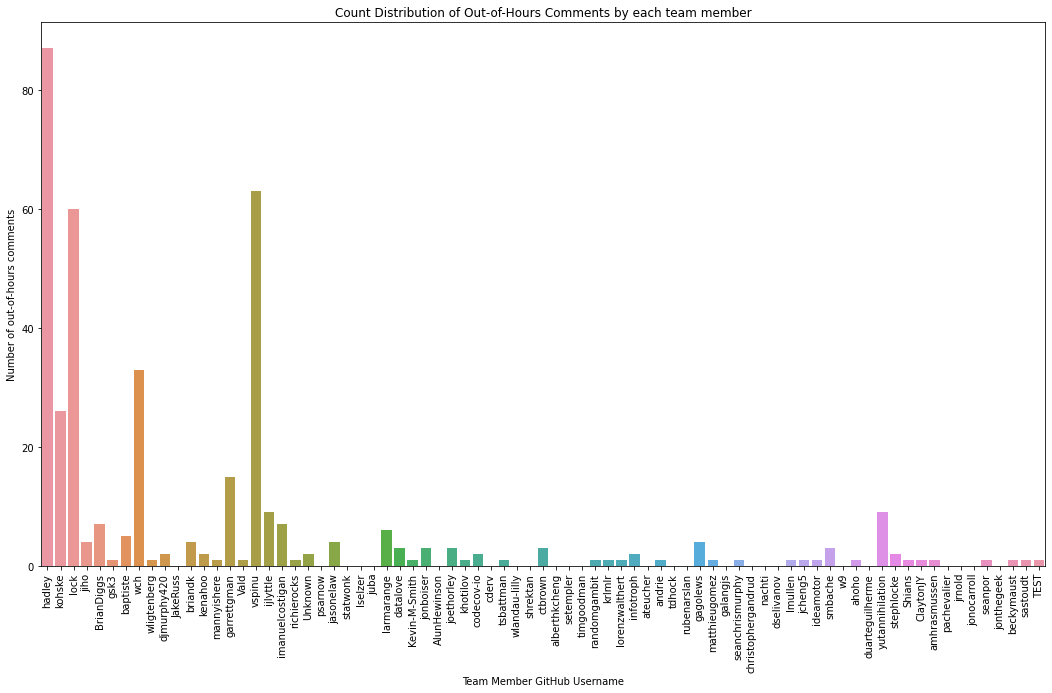

In [66]:
plt.figure(figsize=(18,10))
sb.barplot(x="Team Member GitHub Username", y="Number of out-of-hours comments", data=teamMember_outOfHours_comments_df)
plt.xticks(rotation=90)
plt.title("Count Distribution of Out-of-Hours Comments by each team member")

## 6. Design and implement a similar data visualisation that compares the amount of out of hours work done by each team

In [61]:
# Getting counts of out-of-hours comments per team
team_outOfHours_comments = {}
for index, row in comments_dataset.iterrows():
    author = row["author"]
    team = teamMembers_dataset.loc[teamMembers_dataset['github_username'] == author, "team"].tolist()[0]
    timestamp = row["created date"]
    hour = timestamp.hour
    if (hour < 6 or hour >= 18):
        team_commentCount = team_outOfHours_comments.get(team)
        if team_commentCount != None: team_outOfHours_comments[team] = team_commentCount + 1
        else: team_outOfHours_comments[team] = 1

{'Gryffindor': 127, 'Slytherin': 53, 'Ravenclaw': 121, 'Hufflepuff': 94}


In [62]:
# Getting counts of out-of-hours comments per team, including teams with 0 comments (i.e. Left-Joining with team members dataset)
team_outOfHours_commentsIncludingZeros = {}
for team in teamMembers_dataset["team"].unique():
    teamInitial_commentCount = team_outOfHours_comments.get(team)
    if teamInitial_commentCount != None: team_outOfHours_commentsIncludingZeros[team] = teamInitial_commentCount
    else: team_outOfHours_commentsIncludingZeros[team] = 0

{'Ravenclaw': 121, 'Slytherin': 53, 'Gryffindor': 127, 'Hufflepuff': 94}


In [68]:
# Convert to DataFrame
team_outOfHours_comments_df = pd.DataFrame.from_dict(team_outOfHours_commentsIncludingZeros, orient='index',
                                    columns=["Number of out-of-hours comments"]).reset_index().rename(
                                    columns={"index":"Team Name"})
team_outOfHours_comments_df

,Team Name,Number of out-of-hours comments
0,Ravenclaw,121
1,Slytherin,53
2,Gryffindor,127
3,Hufflepuff,94


Text(0.5, 1.0, 'Count Distribution of Out-of-Hours Comments by each team')

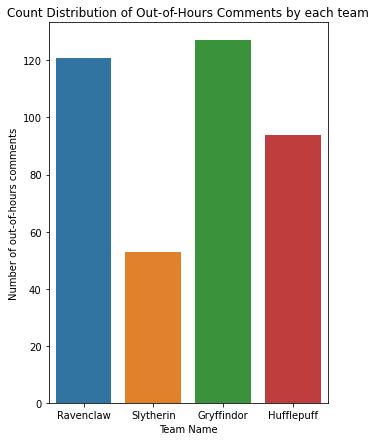

In [73]:
plt.figure(figsize=(5,7))
sb.barplot(x="Team Name", y="Number of out-of-hours comments", data=team_outOfHours_comments_df)
plt.title("Count Distribution of Out-of-Hours Comments by each team")

## Insights


The data shows that while most team members have made at least 1 out-of-hours comment, the majority of the out-of-hours comments have been made by only a few people, such as "hadley", "vspinu", "lock", etc. This may suggest that too much work is falling on these team members, and thus work may need to be distributed differently to reduce their chances of burning out.

Additionally, many more out-of-hours comments have come from members in teams "Gryffindor", "Ravenclaw", and "Hufflepuff" compared to out-of-hours comments from team "Slytherin". This may suggest these teams are spending more hours on their work than Slytherin is on its work, which may thus suggest that the work given to these teams may naturally require much more effort than the work given to team Slytherin. Redistributing the amount of work given to each team may allow the number of out-of-hours comments from each team to be more balanced, thus reducing the chances of any team experiencing burnout.